In [40]:
%env DGL_LIBRARY_PATH=/data/jinjing/dgl/build

env: DGL_LIBRARY_PATH=/data/jinjing/dgl/build


In [1]:
import torch as th
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [26]:
num_points=10
num_points2=10

In [30]:
theta_dist1=np.pi*(np.random.rand(num_points)*2)
theta_dist2=np.pi*(np.random.rand(num_points2)*2)

radius_1=np.random.rand(num_points)
radius_2=np.random.rand(num_points2)*2+3

In [29]:
points_1=np.array([np.cos(theta_dist1)*radius_1,np.sin(theta_dist1)*radius_1])

In [31]:
points_2=np.array([np.cos(theta_dist2)*radius_2,np.sin(theta_dist2)*radius_2])

In [32]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [73]:
point_3=np.array([1,1])

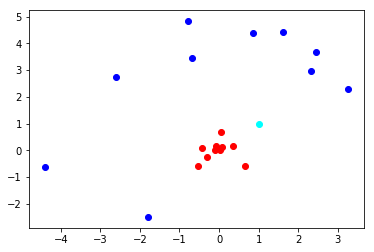

In [74]:
plt.scatter(*points_1,color='red')
plt.scatter(*points_2,color='blue')
plt.scatter(*point_3,color='aqua')

In [48]:
import torch as th
import dgl
import networkx as nx

In [42]:
g=dgl.DGLGraph()

In [43]:
g.add_nodes(num_points+num_points2)

In [44]:
for i in range(num_points):
    for j in range(num_points2):
        g.add_edge(i,j+num_points)

In [80]:
nodes1=list(range(num_points))
nodes2=list(range(num_points,num_points+num_points2))

In [75]:
g.set_n_repr({'h':th.from_numpy(np.concatenate([points_1,points_2],axis=1).T)})

In [115]:
g.update_edge(edge_func=lambda u,v,edge:{'u_hat':u['h']})

In [76]:
g.set_e_repr({'b_ij':th.zeros(100)})
g.set_e_repr({'u_hat':})

In [119]:
def update_edge(self, u, v, edge):
    return {'b_ij': edge['b_ij'] + (v['h'] * edge['u_hat']).mean(dim=1).sum(dim=1)}

In [120]:
def v2_reduce(node, msg):
    b_ij_c, u_hat = msg['b_ij'], msg['u_hat']
    c_i = F.softmax(b_ij_c, dim=0)
    s_j = (c_i.unsqueeze(2).unsqueeze(3) * u_hat).sum(dim=1)
    return {'h': s_j}

In [121]:
def capsule_msg(src, edge):
    return {'b_ij': edge['b_ij'], 'h': src['h'], 'u_hat': edge['u_hat']}


In [124]:
g.number_of_nodes()

20

In [123]:
%debug
g.update_all(capsule_msg,v2_reduce,lambda x:x)

> <ipython-input-120-f6b14912c0b0>(4)v2_reduce()
      1 def v2_reduce(node, msg):
      2     b_ij_c, u_hat = msg['b_ij'], msg['u_hat']
      3     c_i = F.softmax(b_ij_c, dim=0)
----> 4     s_j = (c_i.unsqueeze(2).unsqueeze(3) * u_hat).sum(dim=1)
      5     return {'h': s_j}

ipdb> c_i.shape
torch.Size([10, 40])
ipdb> u_hat.shape
torch.Size([10, 40, 2])
ipdb> q


RuntimeError: The size of tensor a (50) must match the size of tensor b (10) at non-singleton dimension 1

In [ ]:
g.set_e_repr({'u_hat':th.zeros()})

In [ ]:
b_ij=

In [ ]:
g.set_e_repr()

In [47]:
nxg=g.to_networkx()